## Machine Learning 01: k-Nearest Neighbors (answered)

*Prepared by:*  
**Jude Michael Teves**  
Faculty, Software Technology Department  
College of Computer Studies - De La Salle University



## Preliminaries

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('darkgrid')
# sns.color_palette('tab10')
sns.set_palette('Set2')
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

### Load Dataset

We'll be using the **Iris dataset** for this exercise. The dataset contains 3 classes:
 - 0 - Iris-Setosa
 - 1 - Iris-Versicolour
 - 2 - Iris-Virginica

We will also be splitting the dataset into train and test sets.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (150, 4), Output: (150,)
Train Set Size | Input: (120, 4), Output: (120,)
Test Set Size | Input: (30, 4), Output: (30,)


### Visualize the data

In [ ]:
train_set = np.concatenate((X_train, y_train.reshape(-1,1)), axis=1)
df_train = pd.DataFrame(train_set, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
df_train['target'] = df_train['target'].astype(int)

test_set = np.concatenate((X_test, y_test.reshape(-1,1)), axis=1)
df_test = pd.DataFrame(test_set, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
df_test['target'] = df_test['target'].astype(int)

df_train.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,4.6,3.6,1.0,0.2,0
1,5.7,4.4,1.5,0.4,0
2,6.7,3.1,4.4,1.4,1
3,4.8,3.4,1.6,0.2,0
4,4.4,3.2,1.3,0.2,0


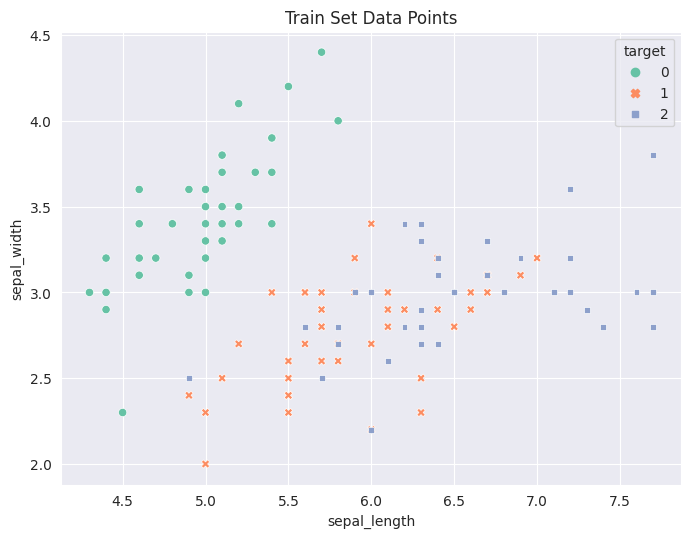

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.scatterplot(data=df_train, x='sepal_length', y='sepal_width', hue='target', style='target', palette="Set2")

plt.title('Train Set Data Points')
plt.show()

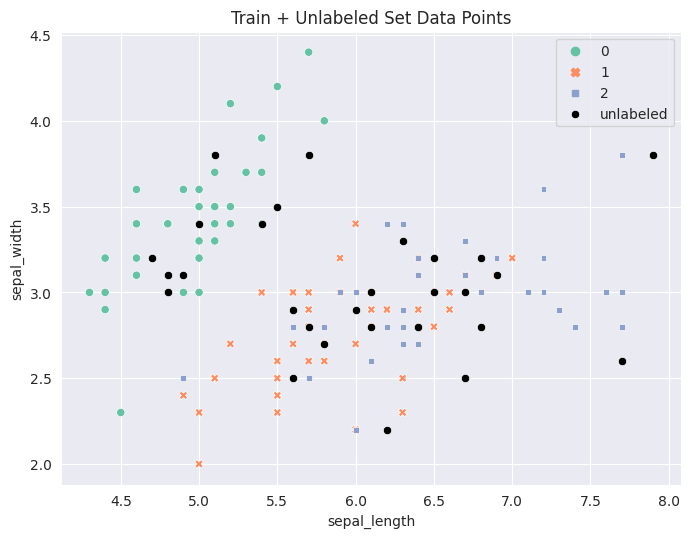

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

sns.scatterplot(data=df_train, x='sepal_length', y='sepal_width', hue='target', style='target', palette="Set2")
sns.scatterplot(data=df_test, x='sepal_length', y='sepal_width', color='black', label='unlabeled')

plt.title('Train + Unlabeled Set Data Points')
plt.show()

## Exercise: Implement Distance Measurement (4 pts)

 - Implement Minkowski distance. 
 - Replace ```raise NotImplementedError``` with your code. 


For reference, here are the formulas for some distance measurements:

 - Manhattan Distance
$$Dist(\bar{X}, \bar{Y}) = \sum_i |x_i - y_i|$$

 - Euclidean Distance
$$Dist(\bar{X}, \bar{Y}) = \sqrt{\sum_i (x_i - y_i)^2}$$

 - Minkowski Distance
$$Dist(\bar{X}, \bar{Y}) = ({\sum_i |x_i - y_i|^p})^{1/p}$$

 



In [ ]:
def minkowski(X, point, p:int=2) -> list:
  '''
  Returns a list of distances of each elements in X from the reference point.
  '''
  raise NotImplementedError
  return distances

Let's check the values of the first data point in our X_test matrix. This will be our reference point.

In [ ]:
X_test[0]

array([6.1, 2.8, 4.7, 1.2])

Then, let's inspect the first 5 values of our X_train matrix. This is a subset of our kNN model's data points.

In [ ]:
X_train[:5]

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2]])

In [ ]:
from numpy.testing import assert_almost_equal

point = X_test[0]
distances = minkowski(X_train, point)
assert_almost_equal(distances[:20], [4.192851058647326, 3.6878177829171555, 0.7615773105863913, 3.558089374931439, 3.950949253027682, 
                                     0.8426149773176357, 0.6164414002968983, 3.5411862419251547, 3.706750598570128, 3.7349698793966195, 
                                     0.8660254037844383, 0.7549834435270751, 0.734846922834954, 3.72827037646145, 3.5411862419251547, 
                                     1.2489995996796794, 0.5385164807134502, 1.0862780491200217, 0.648074069840786, 2.345207879911715])
print('Passed test!')

Passed test!


## Exercise: Get Nearest Neighbors (3 pts)

In [ ]:
def get_nearest_neighbors(X, point, k:int) -> list:
  '''
  Returns indices of nearest neighbors
  '''
  raise NotImplementedError
  return indices

In [ ]:
indices = get_nearest_neighbors(X, point, k=3)
assert indices == [73, 63, 91]
print('Passed test!')

Passed test!


## Exercise: Classify! (3 pts)

In [ ]:
from collections import Counter

def classify(X, y, point, k:int):
  '''
  Returns the classification of a new data point
  '''
  raise NotImplementedError
  return label

In [ ]:
assert classify(X_train, y_train, point, k=3) == 1
print('Passed test!')

Passed test!


### Test if our predictions match the actual...

In [ ]:
y_pred = [classify(X_train, y_train, p, k=3) for p in X_test]
print(f"Score: {sum(y_pred == y_test)/len(y_test):.2%}")

Score: 100.00%


<!-- Okay, so css styling is not supported in Google Colaboratory... :'( -->
<p style="color:blue;">We got perfect accuracy!</p>


### Visualize the results

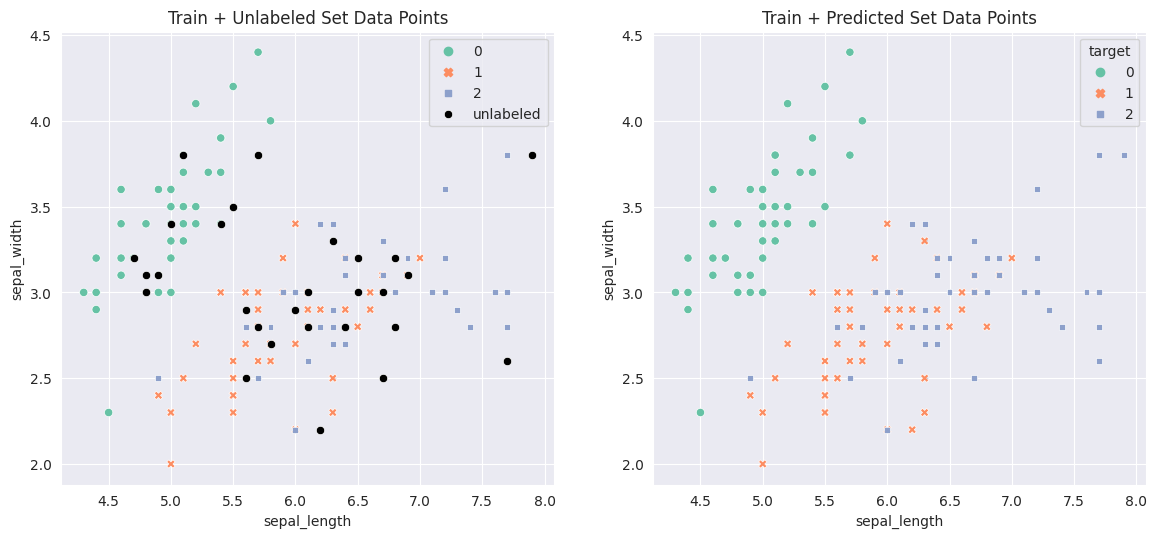

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), dpi=100)

pred_set = np.concatenate((X_test, np.array(y_pred).reshape(-1,1)), axis=1)
df_pred = pd.DataFrame(pred_set, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
df_pred['target'] = df_pred['target'].astype(int)

df_pred = pd.concat([df_train, df_pred])

sns.scatterplot(data=df_train, x='sepal_length', y='sepal_width', hue='target', style='target', palette="Set2", ax=ax1)
sns.scatterplot(data=df_test, x='sepal_length', y='sepal_width', color='black', label='unlabeled', palette="Set2", ax=ax1)
sns.scatterplot(data=df_pred, x='sepal_length', y='sepal_width', hue='target', style='target', palette="Set2", ax=ax2)

ax1.set_title('Train + Unlabeled Set Data Points')
ax2.set_title('Train + Predicted Set Data Points')
plt.show()

## kNN using sklearn

**What is sklearn?**
> "Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities." 

For more details, please refer to <a href="https://scikit-learn.org/stable/getting_started.html">sklearn website</a>.

sklearn has classification and regression implementations for kNN. We'll be using them in the following examples. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

### Classification

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3, p=2, n_jobs=-1) # instantiate model
clf.fit(X_train, y_train) # train the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

We could tweak so many parameters when training Machine Learning models... We will be doing that later.

#### Evaluation

In [ ]:
y_pred = clf.predict(X_train) # predict the corresponding labels given the trained model and input matrix
score = sum(y_pred == y_train)/len(y_train)
print(f"Train Set Score: {score:.2%}")

Train Set Score: 95.00%


In [ ]:
y_pred = clf.predict(X_test) # predict the corresponding labels given the trained model and input matrix
score = sum(y_pred == y_test)/len(y_test)
print(f"Test Set Score: {score:.2%}")

Test Set Score: 100.00%


In [ ]:
score = clf.score(X_test, y_test) # does prediction and score evaluation in 1 line
print(f"Test Set Score: {score:.2%}")

Test Set Score: 100.00%


Since this is an easy dataset, we were able to get very high accuracies for both train and test set.

### Regresssion

We'll be using another dataset for the regression task since we need continuous values as labels / outputs / targets. One readily-available dataset for this is the **Boston dataset**. It contains the house pricing data in Boston as well as the following features:

 - CRIM per capita crime rate by town
 - ZN proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS proportion of non-retail business acres per town
 - CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX nitric oxides concentration (parts per 10 million)
 - RM average number of rooms per dwelling
 - AGE proportion of owner-occupied units built prior to 1940
 - DIS weighted distances to five Boston employment centres
 - RAD index of accessibility to radial highways
 - TAX full-value property-tax rate per \$10,000
 - PTRATIO pupil-teacher ratio by town
 - B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT % lower status of the population
 - MEDV Median value of owner-occupied homes in $1000’s

For more info, please see <a href="https://scikit-learn.org/stable/datasets/index.html#boston-dataset">this link</a>.

And, as usual, we will also be splitting the dataset into train and test sets.

In [ ]:
X, y = datasets.load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (506, 13), Output: (506,)
Train Set Size | Input: (404, 13), Output: (404,)
Test Set Size | Input: (102, 13), Output: (102,)


#### Exploratory Data Analysis (EDA)

Let's do some exploratory data analysis first

In [ ]:
train_set = np.concatenate((X_train, y_train.reshape(-1,1)), axis=1)
columns = datasets.load_boston()['feature_names'].tolist() + ['target']
df_train = pd.DataFrame(train_set, columns=columns)
df_train['target'] = df_train['target'].astype(int)

test_set = np.concatenate((X_test, y_test.reshape(-1,1)), axis=1)
df_test = pd.DataFrame(test_set, columns=columns)
df_test['target'] = df_test['target'].astype(int)

df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12
1,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19
2,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19
3,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13
4,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18


It would be too exhaustive if we check all features so, for now, we'll just be visualizing how crime rate affects house prices.

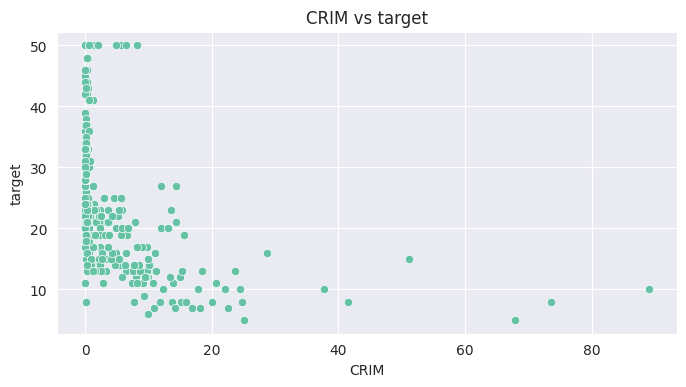

In [ ]:
plt.figure(figsize=(8,4), dpi=100)
sns.scatterplot(data=df_train, x='CRIM', y='target', palette="Set2")
plt.title('CRIM vs target')
plt.show()

What if we check the feature with the highest correlation with the price?

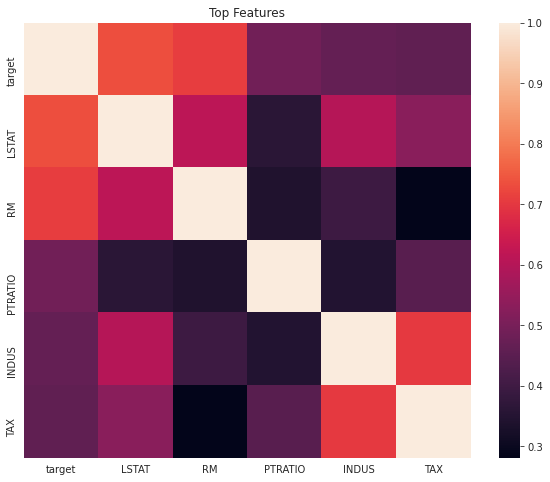

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
corrMatrix = df_train.corr(method='pearson').abs()
corrMatrix = corrMatrix.sort_values(by='target', ascending=False)
features = corrMatrix.index[:6].tolist()
corrMatrix = corrMatrix.loc[features, features]
sns.heatmap(corrMatrix, annot=False)
plt.title('Top Features')
plt.show()

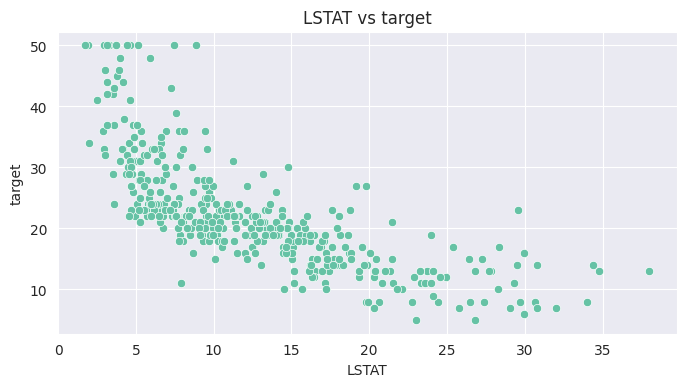

In [ ]:
plt.figure(figsize=(8,4), dpi=100)
sns.scatterplot(data=df_train, x='LSTAT', y='target')
plt.title('LSTAT vs target')
plt.show()

#### Modeling

In [ ]:
reg = KNeighborsRegressor(n_neighbors=3, p=2, n_jobs=-1) # instantiate model
reg.fit(X_train, y_train) # train the model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                    weights='uniform')

#### Evaluation

In regression, we cannot use the accuracy metric since it's for discrete class labels. One metric that is often used in the context of regression is the **coefficient of determination *(R<sup>2</sup> or R-squared)***. For more info, please see <a href="https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score">this link</a>.

Let's use sklearn's built-in r2_score implementation.


In [ ]:
from sklearn.metrics import r2_score

y_pred = reg.predict(X_train) # predict the corresponding labels given the trained model and input matrix

score = r2_score(y_train, y_pred)
print(f"Train Set Score: {score:.2%}")

Train Set Score: 76.72%


#### Visualize differences

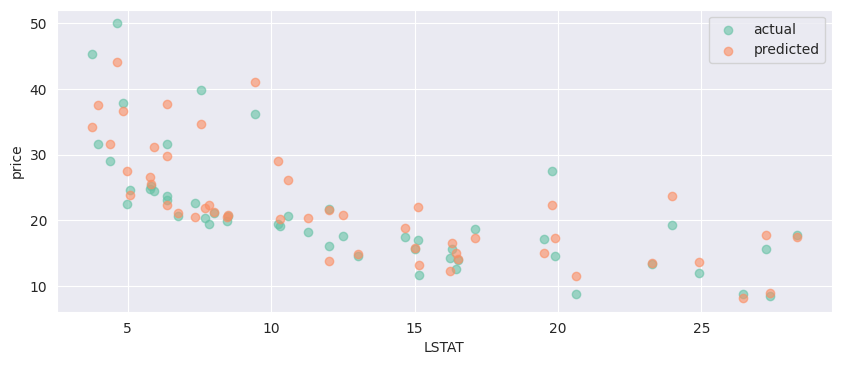

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
plt.scatter(X_train[:50, 12], y_train[:50], label='actual', alpha=0.6)
plt.scatter(X_train[:50, 12], y_pred[:50], label='predicted', alpha=0.6)
plt.legend()
plt.xlabel('LSTAT')
plt.ylabel('price')
plt.show()

#### Exercise: Implement r2_score

In [ ]:
def r_squared(y_true:np.array, y_pred:np.array) -> float:
  '''
  Returns the score using R-squared metric.
  '''
  # raise NotImplementedError
  u = ((y_true - y_pred) ** 2).sum() # residual sum of squares
  v = ((y_true - y_true.mean()) ** 2).sum() # total sum of squares
  score = 1 - (u/v)
  return score

In [ ]:
assert_almost_equal(r2_score(y_train, y_pred), r_squared(y_train, y_pred))
print('Passed test!')

Passed test!


In [ ]:
score = r_squared(y_train, y_pred)
print(f"Train Set Score: {score:.2%}")

Train Set Score: 76.72%


In [ ]:
y_pred = reg.predict(X_test) # predict the corresponding labels given the trained model and input matrix
score = r_squared(y_test, y_pred)
print(f"Test Set Score: {score:.2%}")

Test Set Score: 70.46%


By default, sklearn uses R-squared when evaluation regression tasks.

In [ ]:
score = reg.score(X_test, y_test) # does prediction and score evaluation in 1 line
print(f"Test Set Score: {score:.2%}")

Test Set Score: 70.46%


### Hyperparameter Optimization

#### Train-val-test split
One way of doing evaluation is through train-val-test split. We have already split the train and test earlier. Now, we will be splitting the train set further into train and val sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Val Set Size | Input: {X_val.shape}, Output: {y_val.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (506, 13), Output: (506,)
Train Set Size | Input: (303, 13), Output: (303,)
Val Set Size | Input: (101, 13), Output: (101,)
Test Set Size | Input: (102, 13), Output: (102,)


We will be selecting the model with the best hyperparameter.

In [ ]:
n_params = list(range(1,6))
scores = []

for n_neighbors in n_params:
  reg = KNeighborsRegressor(n_neighbors=n_neighbors, p=2, n_jobs=-1) # instantiate model
  reg.fit(X_train, y_train) # train the model
  train_score = reg.score(X_train, y_train)
  val_score = reg.score(X_val, y_val)
  scores.append([n_neighbors, train_score, val_score])

df_scores = pd.DataFrame(scores, columns=['n', 'train_score', 'val_score'])
df_scores['n'] = df_scores['n'].astype(int)
df_scores.sort_values(by='val_score', ascending=False)

,n,train_score,val_score
1,2,0.834485,0.476486
0,1,1.000000,0.344352
3,4,0.726004,0.337002
2,3,0.745978,0.331292
4,5,0.690706,0.319002


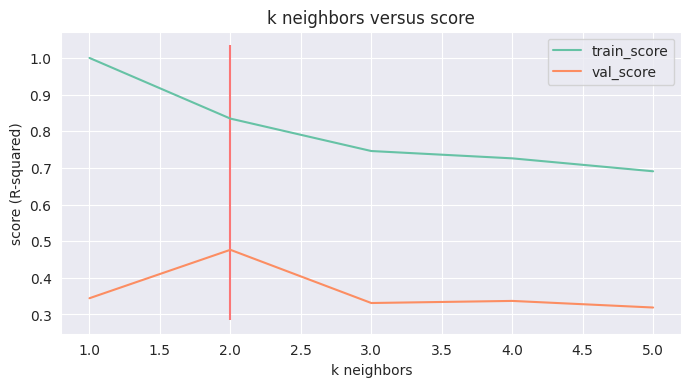

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,4), dpi=100)
df_scores.plot(x='n', ax=ax)

ymin, ymax = ax.get_ylim()
ax.vlines(x=2, ymin=ymin, ymax=ymax, colors='#fb7676')
plt.title('k neighbors versus score')
plt.xlabel('k neighbors')
plt.ylabel('score (R-squared)')
plt.show()

In [ ]:
reg = KNeighborsRegressor(n_neighbors=2, p=2, n_jobs=-1) # instantiate model
reg.fit(X_train, y_train) # train the model
score = reg.score(X_test, y_test) # does prediction and score evaluation in 1 line
print(f"Test Set Score: {score:.2%}")

Test Set Score: 64.44%


#### k-fold Cross Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (506, 13), Output: (506,)
Train Set Size | Input: (404, 13), Output: (404,)
Test Set Size | Input: (102, 13), Output: (102,)


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': range(1,6)}
model = KNeighborsRegressor(p=2, n_jobs=-1)
reg = GridSearchCV(model, parameters, cv=10) # 10 is the rule of thumb
reg.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=-1,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 6)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [ ]:
score = reg.best_estimator_.score(X_train, y_train)
print(f"Train Set Score: {score:.2%}")

Train Set Score: 71.52%


In [ ]:
model = reg.best_estimator_
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(f"Test Set Score: {score:.2%}")

Test Set Score: 67.18%


### More example: Image Classification

Let's try classifying an image data.

In [ ]:
data_bunch = datasets.load_digits(n_class=10, return_X_y=False)
X, y = data_bunch['data'], data_bunch['target']

#### Visualize

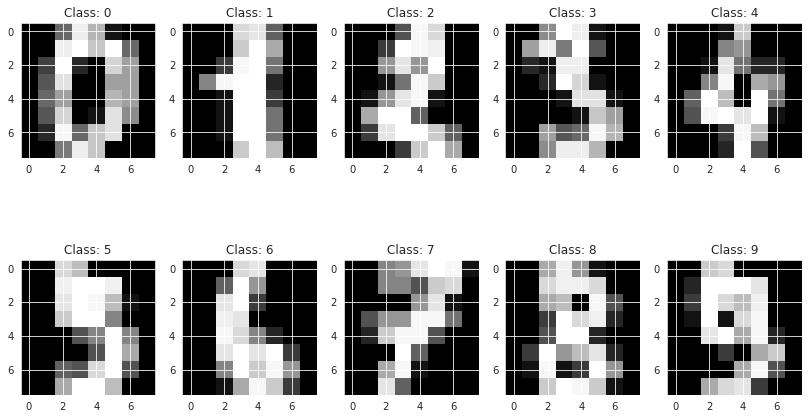

In [ ]:
import matplotlib.cm as cm

fig, ax = plt.subplots(2,5, figsize=(14,8))

for ind in range(10):
    rows = ind // 5
    cols = ind % 5
    ax[rows][cols].imshow((X[ind]).reshape(8,8), cmap=cm.Greys_r)
    ax[rows][cols].set_title(f'Class: {y[ind]}')

#### Preprocessing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1437, 64), (1437,), (360, 64), (360,))

#### Modeling

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1, p=2, n_jobs=-1) # instantiate model
clf.fit(X_train, y_train) # train the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

#### Evaluation

Note that this is an easy dataset. Hence, we're getting **almost perfect results despite the simplicity of the model. In real-world applications, this won't work.**

In [ ]:
score = clf.score(X_train, y_train)
print(f"Train Set Score: {score:.2%}")
score = clf.score(X_test, y_test)
print(f"Test Set Score: {score:.2%}")

Train Set Score: 100.00%
Test Set Score: 97.78%


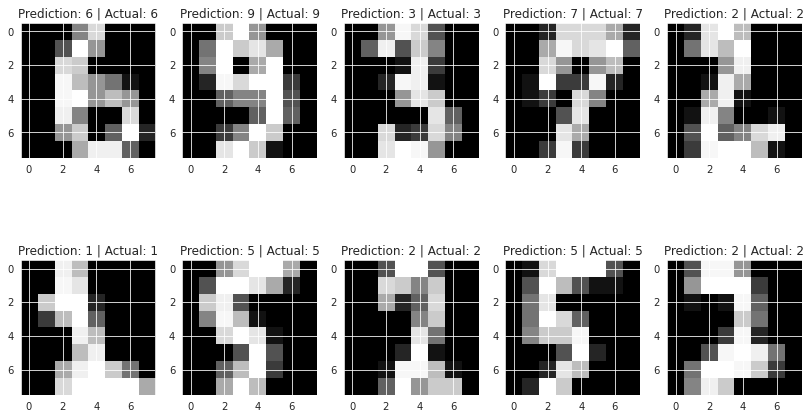

In [ ]:
fig, ax = plt.subplots(2,5, figsize=(14,8))
for ind in range(10):
    rows = ind // 5
    cols = ind % 5
    pred = clf.predict([X_test[ind]])[0]
    actual = y_test[ind]
    ax[rows][cols].imshow((X_test[ind]).reshape(8,8), cmap=cm.Greys_r)
    ax[rows][cols].set_title(f'Prediction: {pred} | Actual: {actual}')

### Exercise: Diabetes dataset

 - Train a kNN model for the diabetes dataset. 
 - Return the score for the test set using the model you trained.

In [ ]:
data_bunch = datasets.load_diabetes(return_X_y=False)

In [ ]:
print(data_bunch['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
X, y = data_bunch['data'], data_bunch['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (442, 10), Output: (442,)
Train Set Size | Input: (353, 10), Output: (353,)
Test Set Size | Input: (89, 10), Output: (89,)


In [ ]:
data_bunch['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
reg = KNeighborsRegressor(n_neighbors=5, p=2)
reg.fit(X_train, y_train)
score = reg.score(X_test, y_test)
print(f'Score: {score:.2%}')

Score: 43.02%


We got a low score. Let's use various graphs to see how far our predictions are from the actual values.

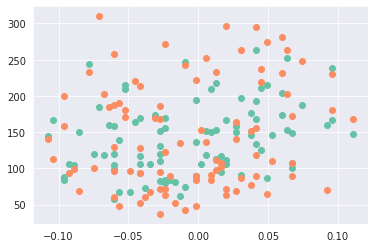

In [ ]:
y_pred = reg.predict(X_test)

plt.scatter(X_test[:, 0], y_pred)
plt.scatter(X_test[:, 0], y_test)
plt.show()

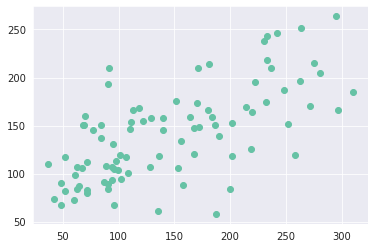

In [ ]:
plt.scatter(y_test, y_pred);

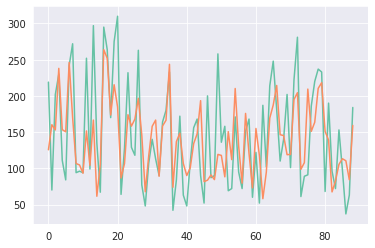

In [ ]:
plt.plot(y_test)
plt.plot(y_pred)
plt.show()

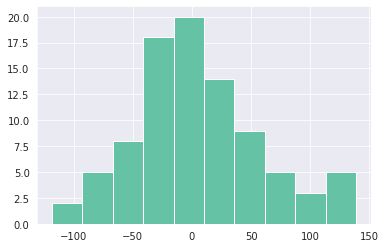

In [ ]:
plt.hist(y_test - y_pred);

## End
<sup>made by **Jude Michael Teves**</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> judemichaelteves@gmail.com or jude.teves@dlsu.edu.ph</sup><br>
